Sharkattack assignment

Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset(opens in a new tab). Use all the skills you've learned up until now to answer the following questions as well as possible.

1 What are the most dangerous types of sharks to humans?

2 Are children more likely to be attacked by sharks?

3 Are shark attacks where sharks were provoked more or less dangerous?

4 Are certain activities more likely to result in a shark attack?

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

For each answer you give not only answer the question but also write about the assumptions you made in answering the question. If an assumption or decision possibly created a bias please write about this as well.


In [82]:
import pandas as pd
import numpy as np

In [83]:
url='https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/sharkattack/attacks.csv'
ds_shark_raw = pd.read_csv(url, delimiter=',', encoding='latin1')

In [84]:
ds_shark_raw.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [85]:
#some columns have spaces remove by renaming (strpping) all spaces
ds_shark_raw.columns = ds_shark_raw.columns.str.replace(' ', '')

In [86]:
#ds_shark_raw.info()

Question1: What are the most dangerous types of sharks to humans?

Assumption: In answering this I made the assumption that would be highest count on the specie and fatal(Y/N)
Cleansing: observations have  been removed for unfilled observations. categorizing has been done for specie

Answer: White Shark attacks humans the most also with the hightest fatal


In [87]:
# data cleansing question 1
# step1 remove empty Species. and useless other observations
# Those records are useless

prep1 = ds_shark_raw.dropna(subset=['Species'])
prep1 = prep1[~prep1['Species'].str.contains('invalid', case =False)]


#step 2 replace values for right category
prep1.loc[prep1['Species'].str.contains('white', case=False), 'Species' ] = 'White Shark'
prep1.loc[prep1['Species'].str.contains('tiger', case=False), 'Species'] = 'Tiger Shark'
prep1.loc[prep1['Species'].str.contains('blue', case=False), 'Species'] = 'Blue Shark'
prep1.loc[prep1['Species'].str.contains('bull', case=False), 'Species'] = 'Bull Shark'
prep1.loc[prep1['Species'].str.contains('dusky', case=False), 'Species'] = 'Dusky Shark'
prep1.loc[prep1['Species'].str.contains('grey', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('gummy', case=False), 'Species'] = 'Gummy Shark'
prep1.loc[prep1['Species'].str.contains('nurse', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('hammer', case=False), 'Species'] = 'Hammerhead Shark'
prep1.loc[prep1['Species'].str.contains('dog', case=False), 'Species'] = 'Piked Spurdog'

prep1.loc[prep1['Species'].str.contains('not cofirmed', case=False), 'Species'] = 'Unknown'
prep1.loc[prep1['Species'].str.contains('unconfirmed', case=False), 'Species'] = 'Unknown'

# category filled ok for 85% observation
(prep1.groupby(['Species']).size().sort_values(ascending=[False]).head(10))

#data fix fatal(Y/N)
prep1 = prep1[~prep1['Fatal(Y/N)'].str.contains('unknown', case =False, na=False)]
prep1 = prep1[~prep1['Fatal(Y/N)'].str.contains('M', case =False, na=False)]
prep1 = prep1[~prep1['Fatal(Y/N)'].str.contains('2017', case =False, na=False)]

#remove space
prep1['Fatal(Y/N)']  = prep1['Fatal(Y/N)'].str.replace(' ','', regex=True)


(prep1.groupby(['Fatal(Y/N)']).size())

#prep1.info()


Fatal(Y/N)
N    2501
Y     427
dtype: int64

<Axes: title={'center': 'Dangerous types of sharks to humans'}, xlabel='Species', ylabel='number of incidents'>

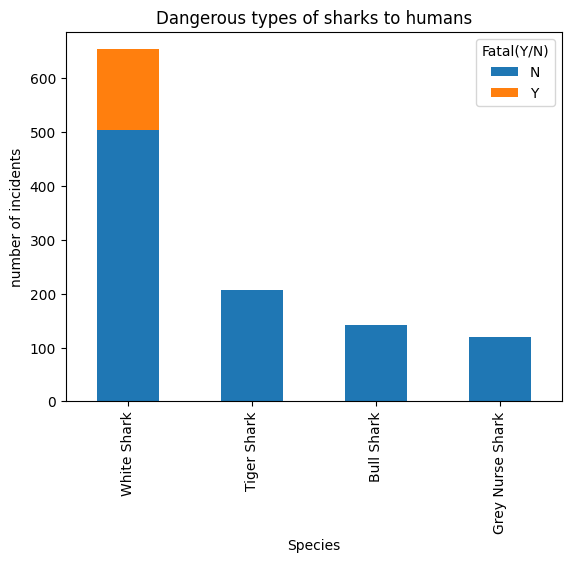

In [88]:
#solution 1: Aggregate on Species in descending order and do a count (size in pandas), take top5 and plot
tussen_resultaat = (prep1
 .groupby(['Species','Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 #.reset_index(name='count')
 .head(5)
)

# series pivot to dataframe
# -1 gaat de laatste kolom pivotten zodat fatal count
# gesplits wordt in aantal N of Y
# index blijft species nodig voor de x-as
ds_ready_for_plot = tussen_resultaat.unstack(level=-1)
#print(ds_ready_for_plot)

#plotten maar
ds_ready_for_plot.plot(kind='bar',stacked=True
                       , title='Dangerous types of sharks to humans'
                       , ylabel='number of incidents')



Question 2: Are children more likely to be attacked by sharks?
Assumption: Categorize all left observations by Age group Adult vs Young and do a count. Create a new column based on this and use this in the final result
Data Cleansing: see below prep 2

Answer: Yes chlidren are attacked more than adults

In [89]:
# data cleansing question 2

prep2 = prep1.copy()

# # prep2.info()
# (prep2.Age.unique()

# datafix age extract number from string
prep2['Age_datafix'] = prep2['Age'].str.extract('(\d+)').apply(pd.to_numeric)

prep2['Age_group'] = prep2['Age_datafix'].apply(lambda x: 'Adult' if x>18 else 'Child'  )

#prep2.groupby(['Age_group']).size()

<Axes: title={'center': 'shark attack Age group'}, xlabel='Age group', ylabel='number of incidents'>

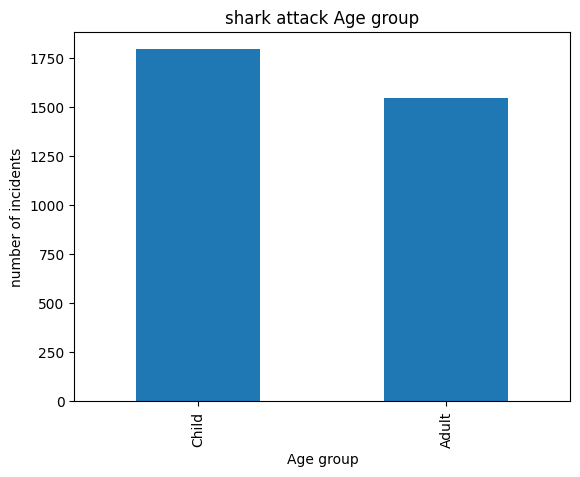

In [90]:
#Solution 2
# aggregate on age do a count in descending order. take top 6 and plot
(prep2
 .groupby('Age_group')
 .size()
 .sort_values(ascending=[False])
 .head(10)
 .plot(kind = "bar", title='shark attack Age group', ylabel='number of incidents', xlabel='Age group')
)

Question 3: Are shark attacks where sharks were provoked more or less dangerous?
Assumption: In this case we need to look more variables. I would do count by Typeand Fatal (Y/N) and take the top 5 and plot it
Answer: Shark are Unprovoked more dangerous

In [91]:
prep3 = prep2.copy()

In [92]:
#data fixes prep3
(prep3
 .groupby(['Type'])
 .size()
)

# Type
# Boat             112
# Boating          136
# Invalid          423
# Provoked         412
# Questionable       2
# Sea Disaster      35
# Unprovoked      2241

prep3 = prep3[~prep3['Type'].str.contains('boat', case =False)]
prep3 = prep3[~prep3['Type'].str.contains('questionable', case =False)]
prep3 = prep3[~prep3['Type'].str.contains('sea', case =False)]
prep3 = prep3[~prep3['Type'].str.contains('invalid', case =False)]


(prep3
 .groupby(['Type'])
 .size()
)

(prep3
 .groupby(['Fatal(Y/N)'])
 .size()
)

Fatal(Y/N)
N    2239
Y     397
dtype: int64

In [93]:
#solution 1: Aggregate on Species in descending order and do a count (size in pandas), take top5 and plot
tussen_resultaat_3 = (prep3
 .groupby(['Type','Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
)
print(tussen_resultaat_3)

# series pivot to dataframe
# -1 gaat de laatste kolom pivotten zodat fatal count
# gesplits wordt in aantal N of Y
# index blijft species nodig voor de x-as
ds_ready_for_plot_3 = tussen_resultaat_3.unstack(level=-1)
print(ds_ready_for_plot_3)



Type        Fatal(Y/N)
Unprovoked  N             1839
Provoked    N              400
Unprovoked  Y              390
Provoked    Y                7
dtype: int64
Fatal(Y/N)     N    Y
Type                 
Provoked     400    7
Unprovoked  1839  390


<Axes: title={'center': 'Dangerous shark attacks provoked or unprovoked'}, xlabel='Type', ylabel='number of incidents'>

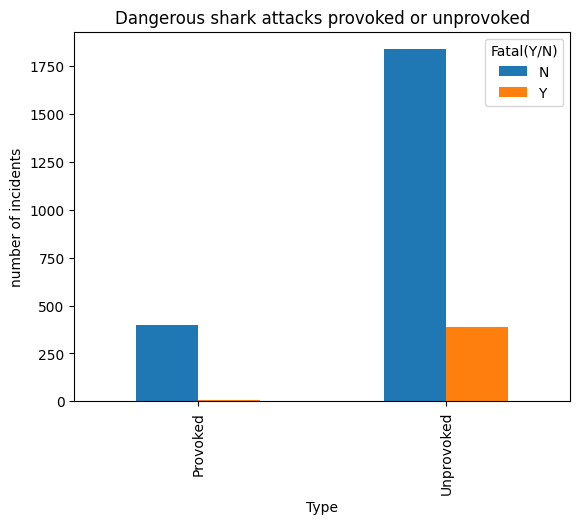

In [94]:
#solution 3
(ds_ready_for_plot_3
 .plot(kind = 'bar', title="Dangerous shark attacks provoked or unprovoked", ylabel="number of incidents")
)

Question4: Are certain activities more likely to result in a shark attack?
Assumption: Take activity and Type and do count.
Datacleansing: replace values of activity and categorize
Answer: Swimming and Surfing, fishing and diving are all dangerous unprovoked.

In [95]:
prep4 = prep3.copy()

In [96]:
prep4.dropna(subset=['Activity'], inplace = True)

#step 2 replace values for right category
prep4.loc[prep4['Activity'].str.contains('paddling', case=False), 'Activity' ] = 'Paddling'
prep4.loc[prep4['Activity'].str.contains('surfing', case=False), 'Activity' ] = 'Surfing'
prep4.loc[prep4['Activity'].str.contains('diving', case=False), 'Activity' ] = 'Diving'
prep4.loc[prep4['Activity'].str.contains('swimming', case=False), 'Activity' ] = 'Swimming'
prep4.loc[prep4['Activity'].str.contains('fishing', case=False), 'Activity' ] = 'Fishing'

#(prep4.Activity.unique())
#(prep4.groupby(['Activity']).size().sort_values(ascending=[False]).head(5))

# Activity
# Surfing     642
# Fishing     535
# Swimming    404
# Diving      312
# Wading       73


In [97]:
tussen_resultaat_4=(prep4
 .groupby(['Activity', 'Type'])
 .size()
 .sort_values(ascending=[False])
 .head(5)
)



<Axes: title={'center': 'Shark attack by activity and type'}, xlabel='Activity', ylabel='number of incidents'>

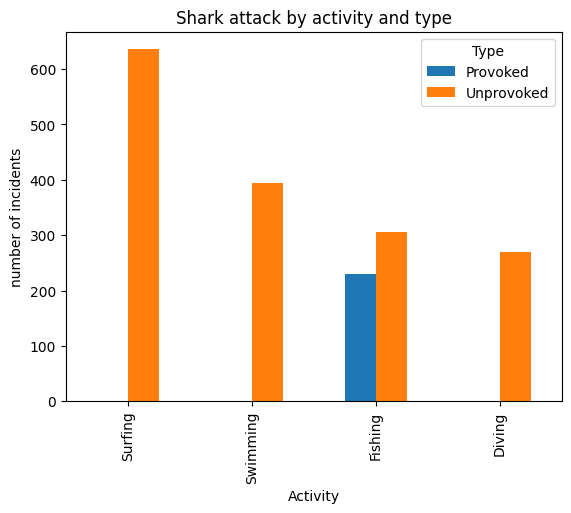

In [98]:
# series pivot to dataframe
# -1 gaat de laatste kolom pivotten zodat fatal count
# gesplits wordt in aantal N of Y
# index blijft species nodig voor de x-as
ds_ready_for_plot_4 = tussen_resultaat_4.unstack(level=-1)
#print(ds_ready_for_plot)

#plotten maar
ds_ready_for_plot_4.plot(kind='bar'
                       , title='Shark attack by activity and type'
                       , ylabel='number of incidents')

